<a href="https://colab.research.google.com/github/Skeo220/UCI-Machine-Learning-Repository/blob/main/heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip3 install -U ucimlrepo

In [4]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo, list_available_datasets

In [19]:
heart_disease = fetch_ucirepo(name='Heart Disease')
features_df = heart_disease.data.features
target_df = heart_disease.data.targets
print("features info:", features_df.shape)
print("targets info:", target_df.shape)

features info: (303, 13)
targets info: (303, 1)


In [25]:
hd_df = pd.concat([features_df, target_df], axis=1)

In [26]:
hd_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [31]:
hd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [32]:
hd_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
cp,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


### Univariate

In [40]:
num_vars = hd_df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]

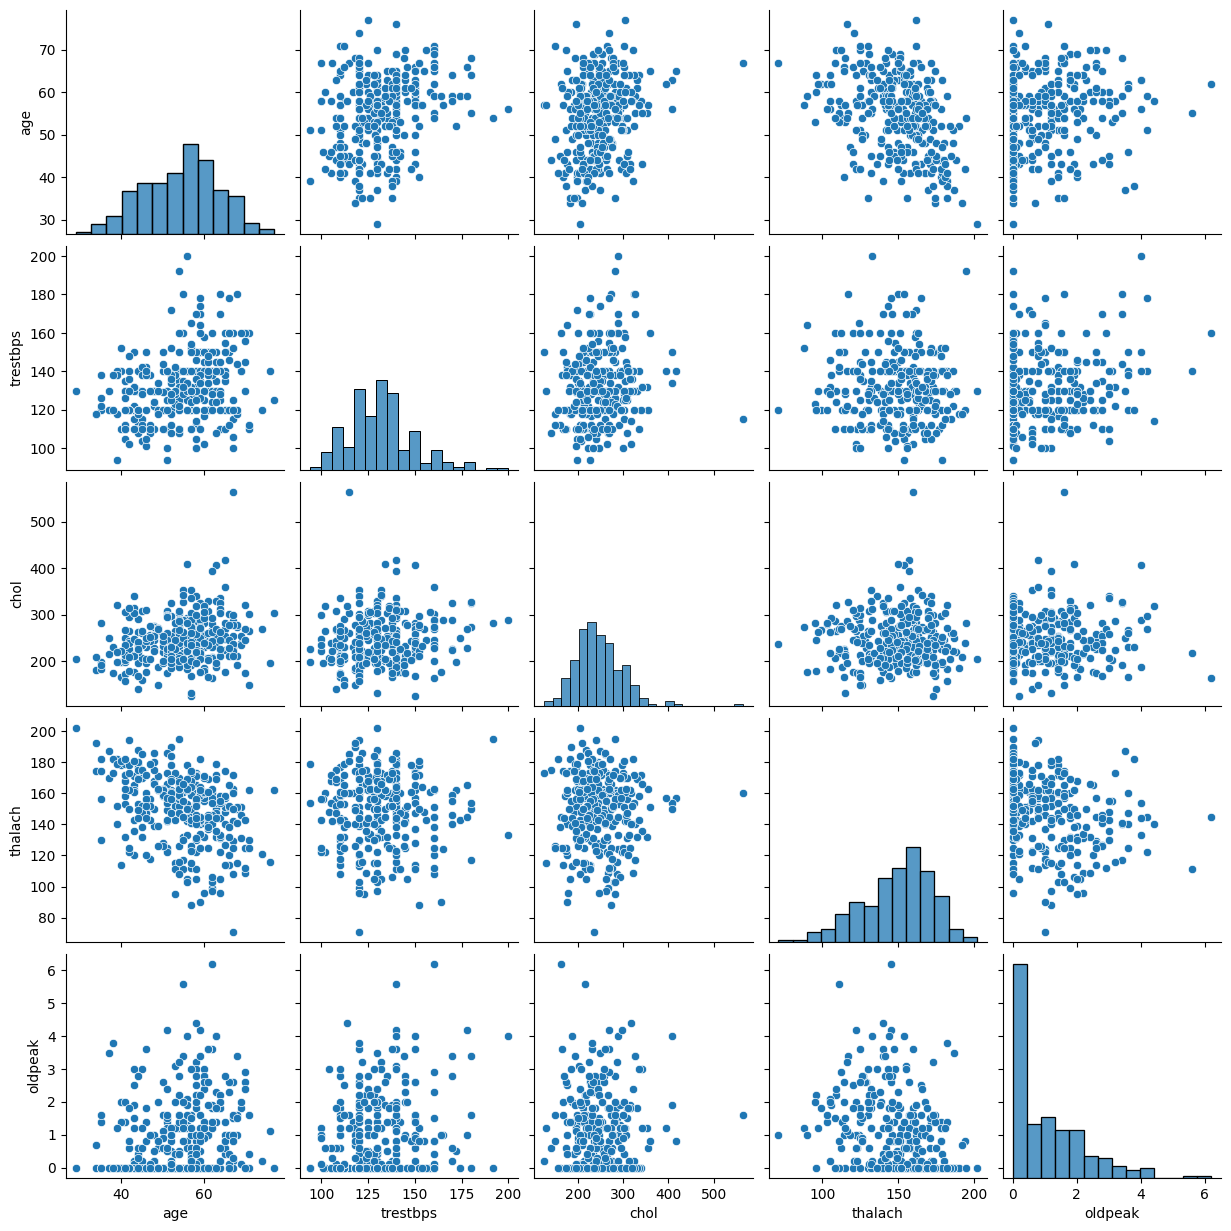

In [41]:
sns.pairplot(hd_df, vars=num_vars.columns)

In [46]:
cols_to_drop = num_vars.columns
cat_vars = hd_df.drop(columns=cols_to_drop)

In [47]:
cat_vars.head()

,sex,cp,fbs,restecg,exang,slope,ca,thal,num
0,1,1,1,2,0,3,0.0,6.0,0
1,1,4,0,2,1,2,3.0,3.0,2
2,1,4,0,2,1,2,2.0,7.0,1
3,1,3,0,0,0,3,0.0,3.0,0
4,0,2,0,2,0,1,0.0,3.0,0


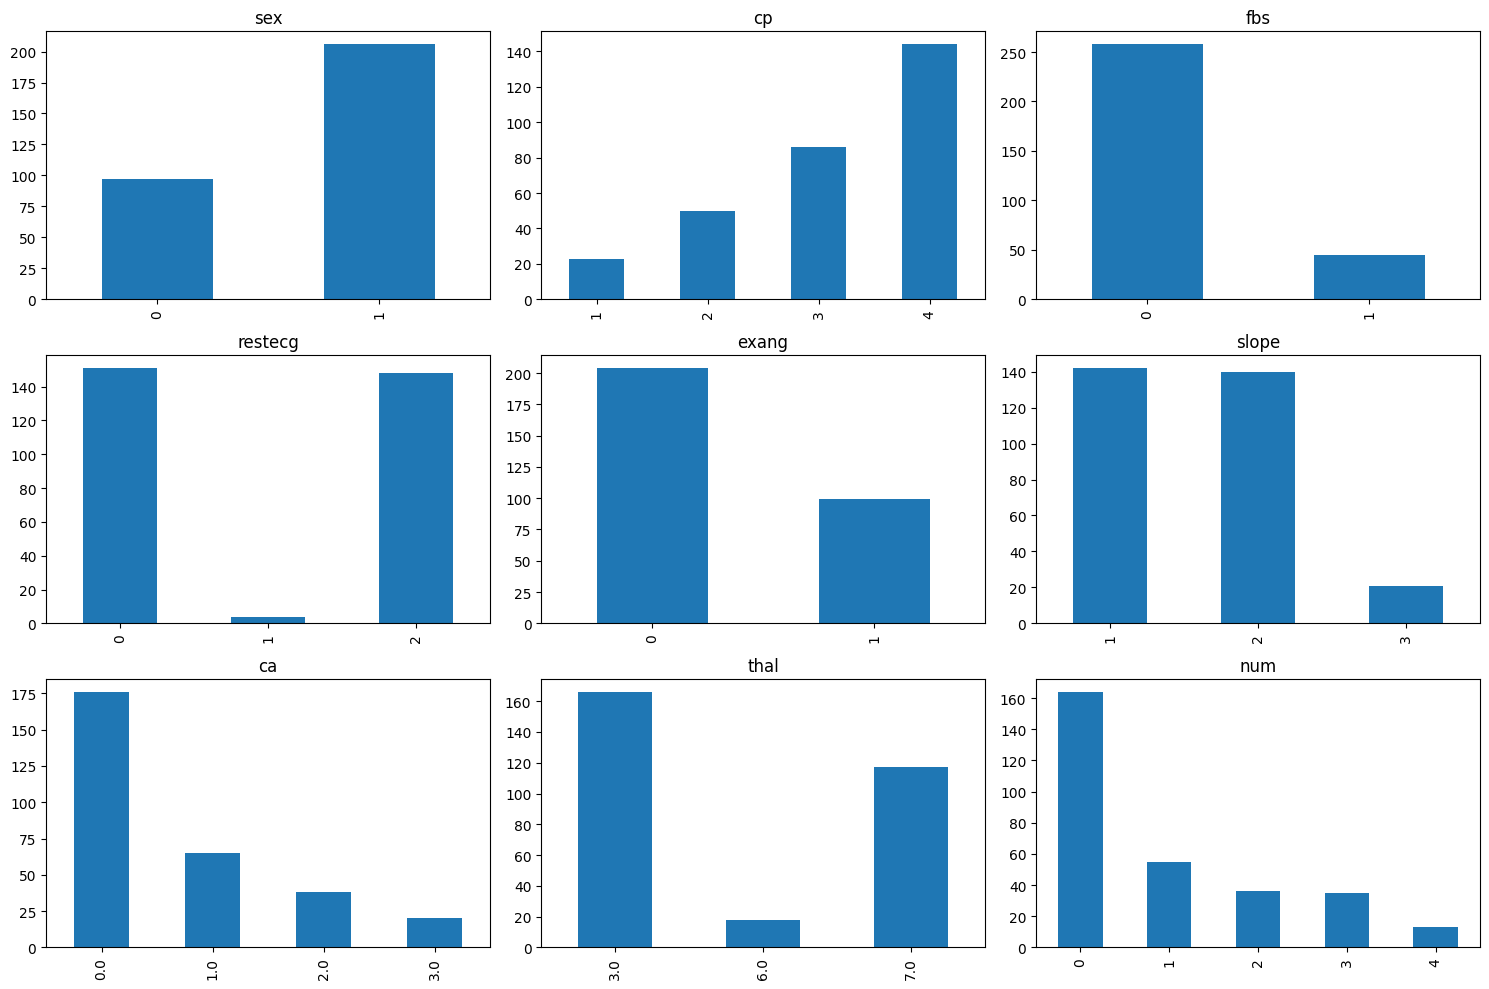

In [49]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
axes = axes.flatten()

for i, col in enumerate(cat_vars.columns):
  ax = axes[i]
  hd_df[col].value_counts().sort_index().plot(kind='bar', ax=ax)
  ax.set_title(col)

plt.tight_layout()
plt.show()

### Bivariate Analysis

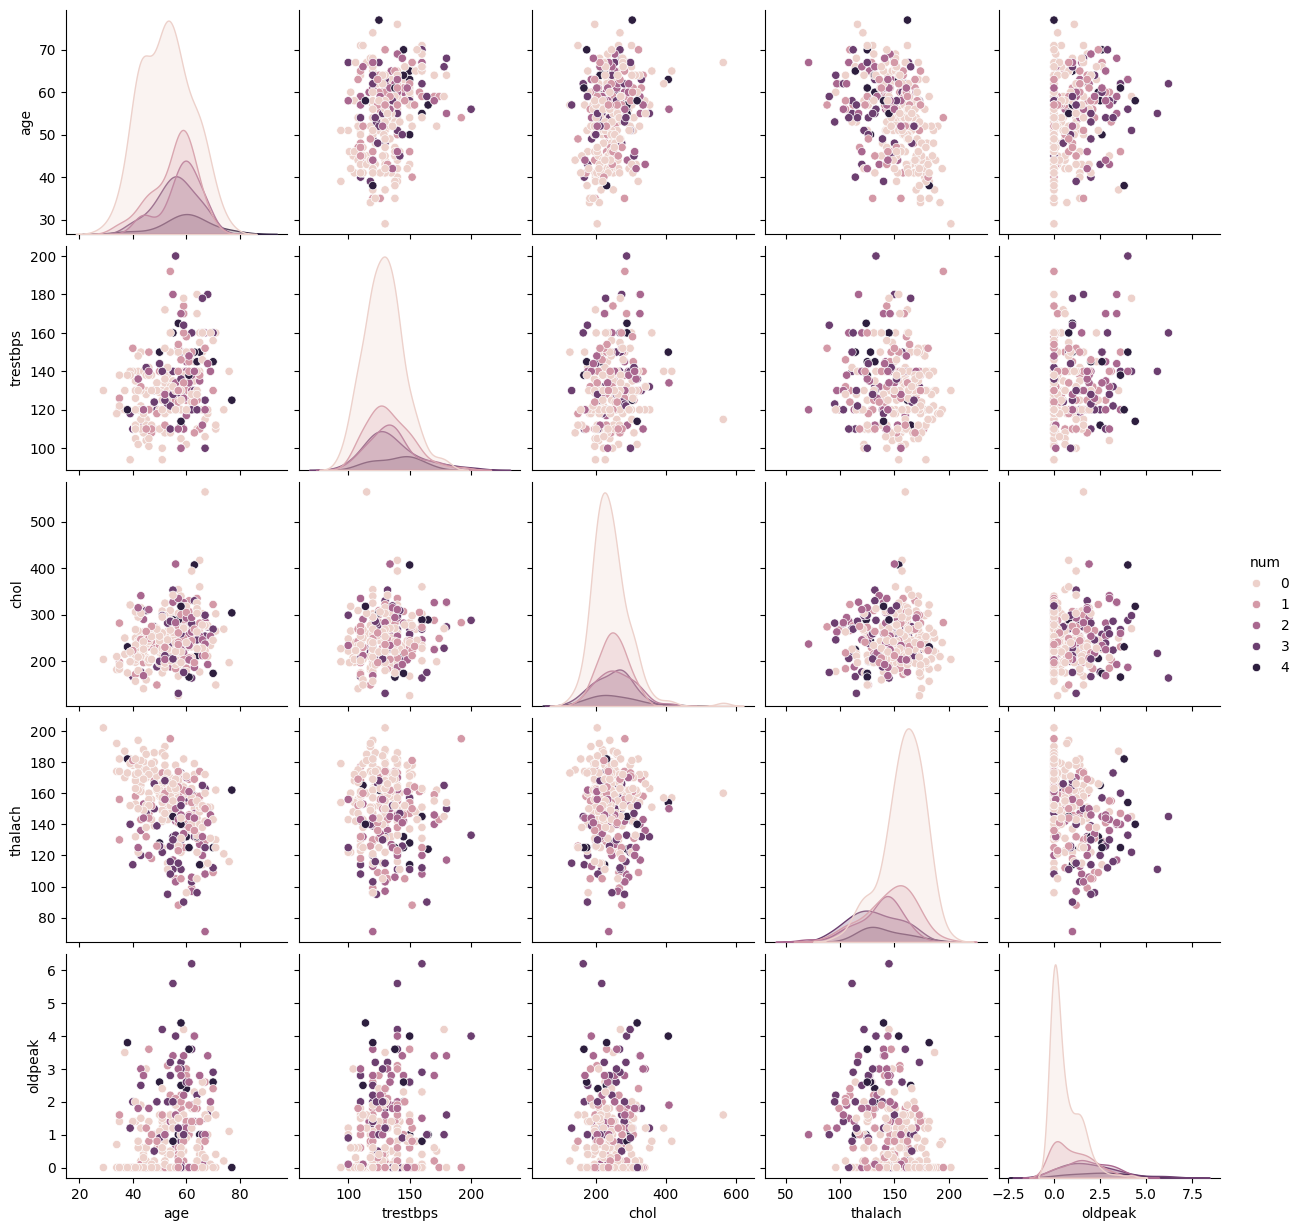

In [42]:
sns.pairplot(hd_df, vars=num_vars.columns, hue='num')